#This is Project 1

## Importing the required Modules

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import os 
import graphviz
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import tensorflow
import keras

In [2]:
#Loading the classification data- If user wants to upload they can , other wise we can manually upload and work too
#from google.colab import files
#uploaded = files.upload()

In [3]:
#Reading classification data
df_creditcard= pd.read_csv("Credit_card_application.csv")
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1


In [4]:
#Loading the classificationCredit_record data
#from google.colab import files
#uploaded = files.upload()


In [5]:
#Reading Data from credit_record csv file.
df_cardrecord= pd.read_csv("credit_record.csv")
df_cardrecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
#shape of creditcard application
df_creditcard.shape

(438557, 18)

In [7]:
#Chcking info of creditcard dataframe
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          422958 non-null  object 
 2   FLAG_OWN_CAR         416886 non-null  object 
 3   FLAG_OWN_REALTY      416818 non-null  object 
 4   CNT_CHILDREN         416976 non-null  float64
 5   AMT_INCOME_TOTAL     417203 non-null  float64
 6   NAME_INCOME_TYPE     416524 non-null  object 
 7   NAME_EDUCATION_TYPE  415537 non-null  object 
 8   NAME_FAMILY_STATUS   416543 non-null  object 
 9   NAME_HOUSING_TYPE    415359 non-null  object 
 10  DAYS_BIRTH           416558 non-null  float64
 11  DAYS_EMPLOYED        416921 non-null  float64
 12  FLAG_MOBIL           416527 non-null  float64
 13  FLAG_WORK_PHONE      417023 non-null  float64
 14  FLAG_PHONE           417737 non-null  float64
 15  FLAG_EMAIL       

In [8]:
#shape of creditcard record
df_cardrecord.shape

(1048575, 3)

In [9]:
#Chcking info of cardrecord dataframe
df_cardrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
#Checking columns creditcard
df_creditcard.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
#Checking columns cardrecord
df_cardrecord.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [12]:
#Checking null values in df_creditcard
df_creditcard.isna().sum()

ID                          0
CODE_GENDER             15599
FLAG_OWN_CAR            21671
FLAG_OWN_REALTY         21739
CNT_CHILDREN            21581
AMT_INCOME_TOTAL        21354
NAME_INCOME_TYPE        22033
NAME_EDUCATION_TYPE     23020
NAME_FAMILY_STATUS      22014
NAME_HOUSING_TYPE       23198
DAYS_BIRTH              21999
DAYS_EMPLOYED           21636
FLAG_MOBIL              22030
FLAG_WORK_PHONE         21534
FLAG_PHONE              20820
FLAG_EMAIL              20654
OCCUPATION_TYPE        134725
CNT_FAM_MEMBERS             0
dtype: int64

In [13]:
#Checking null values in df_cardrecord
df_cardrecord.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [14]:
#We see that nearly 5-10% data is missing in df_creditcard dataframe.
#We will be analysing each column in df_creditcard and substituting with appropriate values df_creditcard['CODE_GENDER']

print(df_creditcard['CODE_GENDER'].value_counts())
print("\nNumber of null values are",df_creditcard['CODE_GENDER'].isna().sum())
# substituting nulls with maximum value that is F
df_creditcard['CODE_GENDER'].replace(to_replace=np.NaN,value='F',inplace=True)

F    284011
M    138947
Name: CODE_GENDER, dtype: int64

Number of null values are 15599


In [15]:
#df_creditcard['CODE_GENDER'] decription
df_creditcard['CODE_GENDER'].describe()

count     438557
unique         2
top            F
freq      299610
Name: CODE_GENDER, dtype: object

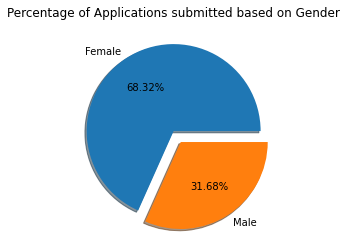

In [16]:
#Visulaization of male and female
explode =[0.0, 0.15]
plt.pie(df_creditcard['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Gender')
plt.show()

In [17]:
df_creditcard['CODE_GENDER'].isna().sum()

0

In [18]:
#Mapping Female to 1 and male to 0
df_creditcard['CODE_GENDER'] = df_creditcard['CODE_GENDER'].map({'F':1, 'M':0}).astype(object)

In [19]:
df_creditcard['CODE_GENDER'].value_counts()

1    299610
0    138947
Name: CODE_GENDER, dtype: int64

In [20]:
# FLAG_OWN_CAR column
print(df_creditcard['FLAG_OWN_CAR'].value_counts())
print("\nNumber of null values are",df_creditcard['FLAG_OWN_CAR'].isna().sum())

N    261672
Y    155214
Name: FLAG_OWN_CAR, dtype: int64

Number of null values are 21671


In [21]:
# substituting nulls with maximum value that is F
df_creditcard['FLAG_OWN_CAR'].replace(to_replace=np.NaN,value='N',inplace=True)

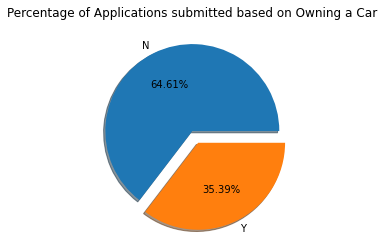

In [22]:
#Visulaization of FLAG_OWN_CAR column
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_OWN_CAR'].value_counts(), labels=['N', 'Y'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Owning a Car')
plt.show()

In [23]:
df_creditcard['FLAG_OWN_CAR'].value_counts()

N    283343
Y    155214
Name: FLAG_OWN_CAR, dtype: int64

In [24]:
df_creditcard['FLAG_OWN_CAR'] = df_creditcard['FLAG_OWN_CAR'].map({'N':1, 'Y':0}).astype(int)

In [25]:
df_creditcard['FLAG_OWN_CAR'].value_counts()

1    283343
0    155214
Name: FLAG_OWN_CAR, dtype: int64

In [26]:
# Now Based on owing reality
print(df_creditcard['FLAG_OWN_REALTY'].value_counts())
print("\nNumber of null values are",df_creditcard['FLAG_OWN_REALTY'].isna().sum())

Y    289612
N    127206
Name: FLAG_OWN_REALTY, dtype: int64

Number of null values are 21739


In [27]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

Y    289612
N    127206
Name: FLAG_OWN_REALTY, dtype: int64

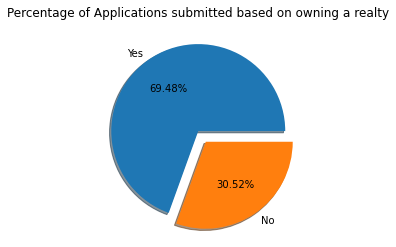

In [28]:
# Visulization based on owning a realty
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_OWN_REALTY'].value_counts(), labels=['Yes', 'No'],explode=explode,shadow= 0.2, autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on owning a realty')
plt.show()

In [29]:
df_creditcard['FLAG_OWN_REALTY'].replace(to_replace=np.NaN,value='Y',inplace=True)

In [30]:
df_creditcard['FLAG_OWN_REALTY'] = df_creditcard['FLAG_OWN_REALTY'].map({'Y':1, 'N':0}).astype(object)

In [31]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

1    311351
0    127206
Name: FLAG_OWN_REALTY, dtype: int64

In [32]:
df_creditcard['FLAG_OWN_REALTY'].isna().sum()

0

In [33]:
df_creditcard['FLAG_OWN_REALTY'].value_counts()

1    311351
0    127206
Name: FLAG_OWN_REALTY, dtype: int64

In [34]:
#Counting children - CNT_CHILDREN
df_creditcard['CNT_CHILDREN'].value_counts()

0.0     289135
1.0      84224
2.0      37881
3.0       5117
4.0        463
5.0        133
7.0          9
9.0          5
12.0         4
6.0          4
19.0         1
Name: CNT_CHILDREN, dtype: int64

In [35]:
#This ordinal data, but no changes are been made because children can be any whole number in real-time
#Checking for null value
df_creditcard['CNT_CHILDREN'].isna().sum()

21581

In [36]:
#Mapping missing values to 0 children
df_creditcard['CNT_CHILDREN'].replace(to_replace=np.NaN,value=0,inplace=True)

In [37]:
#AMT_INCOME_TOTAL is a continuous value
df_creditcard['AMT_INCOME_TOTAL'].value_counts()

135000.00    44739
157500.00    37730
180000.00    35950
112500.00    35203
225000.00    32648
             ...  
109603.35        1
123916.50        1
32139.00         1
362911.50        1
125730.00        1
Name: AMT_INCOME_TOTAL, Length: 841, dtype: int64

In [38]:
df_creditcard['AMT_INCOME_TOTAL'].isna().sum()

21354

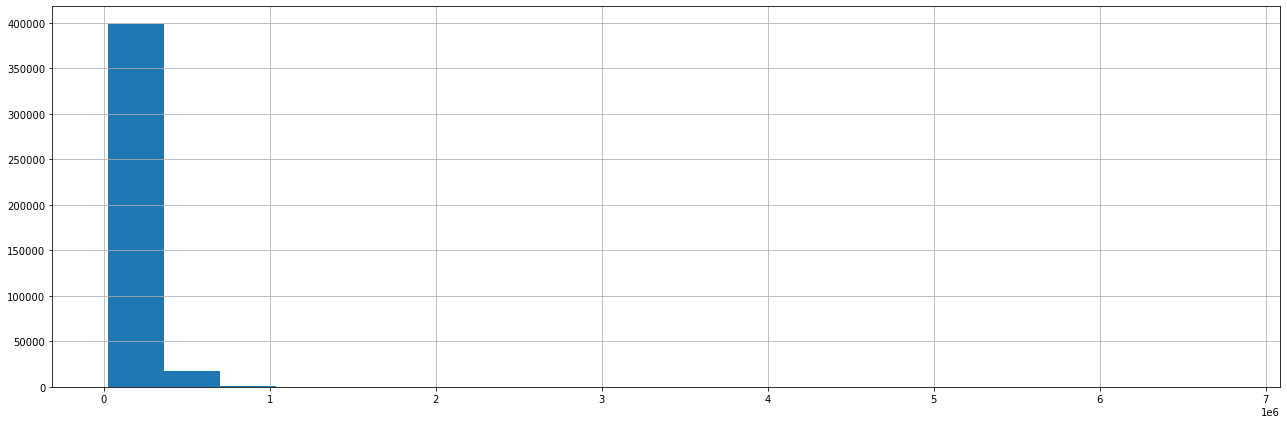

In [39]:
#plot visulaization of AMT_INCOME_TOTAL column
plt.figure(figsize=(22,7))
plt.hist(df_creditcard['AMT_INCOME_TOTAL'],bins=20)
plt.grid()
plt.show()

In [40]:
# The visualization is slightly skewed, so we are replcing null values with median of the AMT_INCOME_TOTAL column
df_creditcard['AMT_INCOME_TOTAL'].replace(to_replace=np.NaN,value=df_creditcard['AMT_INCOME_TOTAL'].median(),inplace=True)

In [41]:
#After replacing with median values
df_creditcard['AMT_INCOME_TOTAL'].value_counts()

135000.00    44739
157500.00    37730
180000.00    35950
112500.00    35203
225000.00    32648
             ...  
109603.35        1
123916.50        1
32139.00         1
362911.50        1
125730.00        1
Name: AMT_INCOME_TOTAL, Length: 841, dtype: int64

In [42]:
#Validating NAME_INCOME_TYPE column
df_creditcard['NAME_INCOME_TYPE'].value_counts()

Working                 214760
Commercial associate     95771
Pensioner                71770
State servant            34214
Student                      9
Name: NAME_INCOME_TYPE, dtype: int64

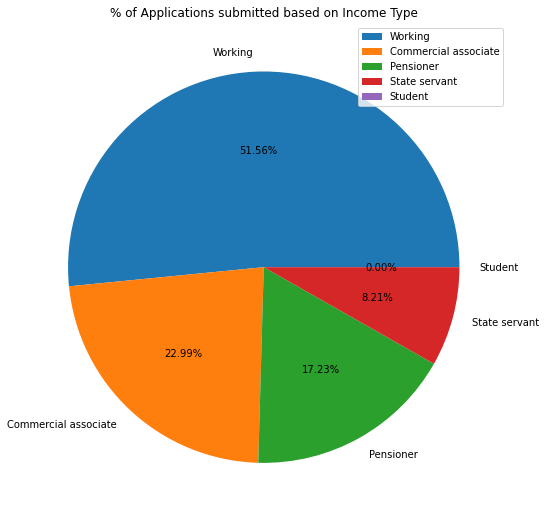

In [43]:
#Visulization of NAME_INCOME_TYPE column
plt.figure(figsize = (9,9))
plt.pie(df_creditcard['NAME_INCOME_TYPE'].value_counts(), 
        labels=df_creditcard['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

In [44]:
#Checking for null values
df_creditcard['NAME_INCOME_TYPE'].isna().sum()

22033

In [45]:
# Here 22033 have null values, so we are putting them in 'Working category' rather than putting in No working as this would cause an impact in another way
df_creditcard['NAME_INCOME_TYPE'].replace(to_replace=np.NaN,value='Working',inplace=True)

In [46]:
#we use one-hot encoding on NAME_INCOME_TYPE
cols = pd.get_dummies(df_creditcard['NAME_INCOME_TYPE'], prefix= 'NAME_INCOME_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_INCOME_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working
0,5008804,0,0,1,0.0,427500.0,Higher education,Civil marriage,Rented apartment,-12005.0,...,1.0,0.0,0.0,NaN,2,0,0,0,0,1
1,5008805,0,0,1,0.0,427500.0,Higher education,Civil marriage,Rented apartment,-12005.0,...,1.0,0.0,0.0,NaN,2,0,0,0,0,1
2,5008806,0,0,1,0.0,112500.0,Secondary / secondary special,Married,House / apartment,-21474.0,...,0.0,0.0,0.0,Security staff,2,0,0,0,0,1
3,5008808,1,1,1,0.0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110.0,...,0.0,1.0,1.0,Sales staff,1,1,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,Secondary / secondary special,Single / not married,House / apartment,-19110.0,...,0.0,1.0,1.0,Sales staff,1,1,0,0,0,0


In [47]:
#Checking for data in NAME_EDUCATION_TYPE column
df_creditcard['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    286031
Higher education                 111433
Incomplete higher                 13921
Lower secondary                    3886
Academic degree                     266
Name: NAME_EDUCATION_TYPE, dtype: int64

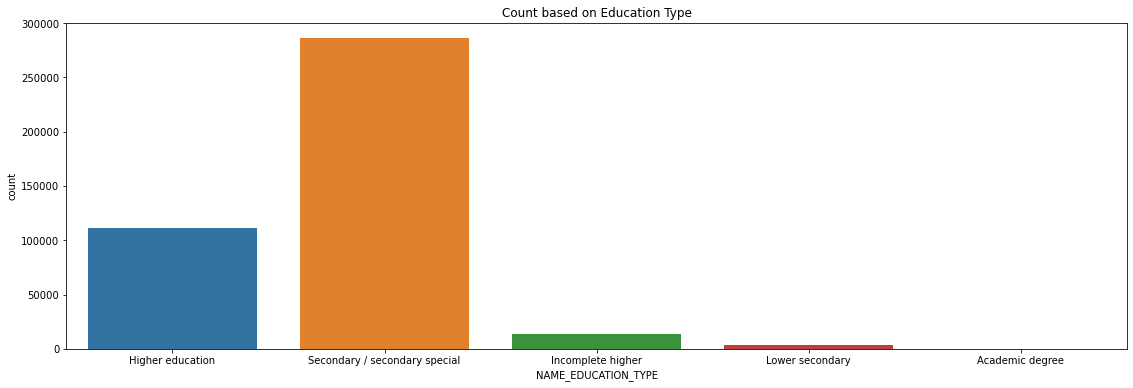

In [48]:
#PLotting visulaization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_EDUCATION_TYPE',data=df_creditcard)
plt.title('Count based on Education Type')
plt.show()

In [49]:
#checking for null values
df_creditcard['NAME_EDUCATION_TYPE'].isna().sum()

23020

In [50]:
#Replcing null value with highest Education Type
df_creditcard['NAME_EDUCATION_TYPE'].replace(to_replace=np.NaN,value='Secondary / secondary special',inplace=True)

In [51]:
#we use one-hot encoding on NAME_EDUCATION_TYPE<ask akansha if below is right or should we use 0,1,2,3>
cols = pd.get_dummies(df_creditcard['NAME_EDUCATION_TYPE'], prefix= 'NAME_EDUCATION_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_EDUCATION_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,5008804,0,0,1,0.0,427500.0,Civil marriage,Rented apartment,-12005.0,-4542.0,...,0,0,0,0,1,0,1,0,0,0
1,5008805,0,0,1,0.0,427500.0,Civil marriage,Rented apartment,-12005.0,-4542.0,...,0,0,0,0,1,0,1,0,0,0
2,5008806,0,0,1,0.0,112500.0,Married,House / apartment,-21474.0,-1134.0,...,0,0,0,0,1,0,0,0,0,1
3,5008808,1,1,1,0.0,270000.0,Single / not married,House / apartment,-19110.0,-3051.0,...,1,0,0,0,0,0,0,0,0,1
4,5008809,1,1,1,0.0,270000.0,Single / not married,House / apartment,-19110.0,-3051.0,...,1,0,0,0,0,0,0,0,0,1


In [52]:
#Checking for NAME_FAMILY_STATUS columns
df_creditcard['NAME_FAMILY_STATUS'].value_counts()

Married                 284648
Single / not married     52723
Civil marriage           34583
Separated                25811
Widow                    18778
Name: NAME_FAMILY_STATUS, dtype: int64

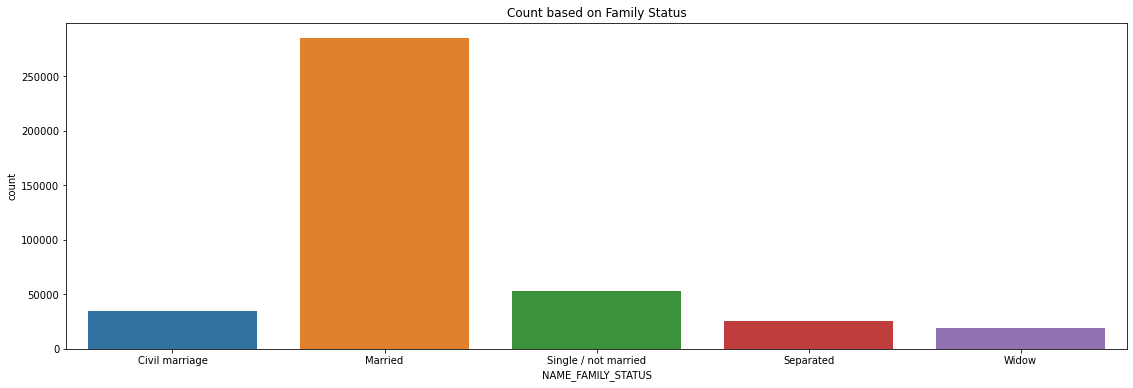

In [53]:
#Visulization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_FAMILY_STATUS',data=df_creditcard)
plt.title('Count based on Family Status')
plt.show()

In [54]:
#Checking for null values
df_creditcard['NAME_FAMILY_STATUS'].isna().sum()

22014

In [55]:
#Replcing Null values with highest value- married
df_creditcard['NAME_FAMILY_STATUS'].replace(to_replace=np.NaN,value='Married',inplace=True)

In [56]:
#Nulls after substituting
df_creditcard['NAME_FAMILY_STATUS'].isna().sum()

0

In [57]:
#we use one-hot encoding on NAME_FAMILY_STATUS
cols = pd.get_dummies(df_creditcard['NAME_FAMILY_STATUS'], prefix= 'NAME_FAMILY_STATUS')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_FAMILY_STATUS', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,5008804,0,0,1,0.0,427500.0,Rented apartment,-12005.0,-4542.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5008805,0,0,1,0.0,427500.0,Rented apartment,-12005.0,-4542.0,1.0,...,0,1,0,0,0,1,0,0,0,0
2,5008806,0,0,1,0.0,112500.0,House / apartment,-21474.0,-1134.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,5008808,1,1,1,0.0,270000.0,House / apartment,-19110.0,-3051.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,5008809,1,1,1,0.0,270000.0,House / apartment,-19110.0,-3051.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
#NAME_HOUSING_TYPE column
df_creditcard['NAME_HOUSING_TYPE'].value_counts()

House / apartment      372961
With parents            18078
Municipal apartment     13549
Rented apartment         5573
Office apartment         3719
Co-op apartment          1479
Name: NAME_HOUSING_TYPE, dtype: int64

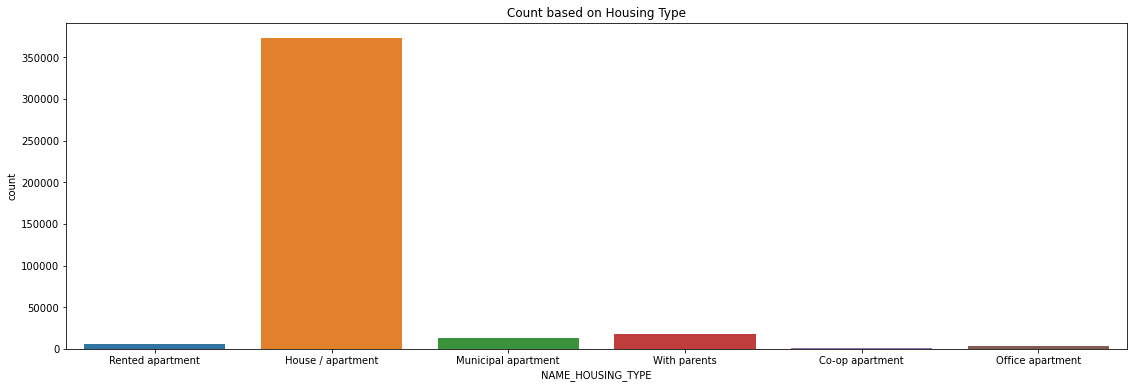

In [59]:
#Visulization
plt.figure(figsize=(19,6))
sns.countplot(x='NAME_HOUSING_TYPE',data=df_creditcard)
plt.title('Count based on Housing Type')
plt.show()

In [60]:
# Checking for null values
df_creditcard['NAME_HOUSING_TYPE'].isna().sum()

23198

In [61]:
#Replcing null values with maximum modal value 
df_creditcard['NAME_HOUSING_TYPE'].replace(to_replace=np.NaN,value='House / apartment',inplace=True)

In [62]:
# Checking for null values after substituting
df_creditcard['NAME_HOUSING_TYPE'].isna().sum()

0

In [63]:
#Applying one-hot vector
cols = pd.get_dummies(df_creditcard['NAME_HOUSING_TYPE'], prefix= 'NAME_HOUSING_TYPE')
df_creditcard[cols.columns] = cols
df_creditcard.drop('NAME_HOUSING_TYPE', axis = 1, inplace = True)
df_creditcard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,0,0,1,0.0,427500.0,-12005.0,-4542.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,0,0,1,0.0,427500.0,-12005.0,-4542.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,0,0,1,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,1,1,1,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [64]:
#Checking for Days_Birth 
df_creditcard['DAYS_BIRTH'].value_counts()

-11707.0    150
-14400.0    116
-14178.0    116
-14055.0    111
-20107.0    106
           ... 
-9304.0       1
-18399.0      1
-8098.0       1
-9399.0       1
-24802.0      1
Name: DAYS_BIRTH, Length: 16331, dtype: int64

In [65]:
df_creditcard['DAYS_BIRTH'].isna().sum()

21999

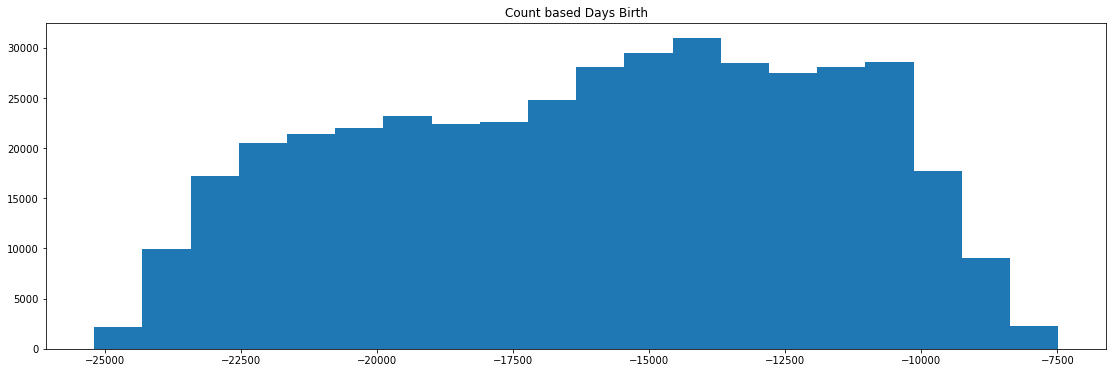

In [66]:
#Visalization of DAYS_BIRTH column
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['DAYS_BIRTH'],bins='sturges')
plt.title('Count based Days Birth')
plt.show()

In [67]:
#Replacing null values with median as data is slightly skewed
df_creditcard['DAYS_BIRTH'].replace(to_replace=np.NaN,value=df_creditcard['DAYS_BIRTH'].median(),inplace=True)

In [68]:
#Converting DAYS_BIRTH into YEARS
df_creditcard['DAYS_BIRTH'] = round(df_creditcard['DAYS_BIRTH']/-365,0)
df_creditcard.rename(columns={'DAYS_BIRTH':'YEARS'}, inplace=True)
df_creditcard['YEARS'].value_counts()

43.0    33951
39.0    13347
40.0    12559
42.0    12286
32.0    12125
38.0    12070
28.0    12060
41.0    11957
37.0    11863
36.0    11764
30.0    11704
35.0    11617
44.0    11541
29.0    11501
33.0    11454
34.0    11285
31.0    10787
46.0    10271
45.0    10169
54.0     9985
47.0     9712
48.0     9510
53.0     9372
52.0     9347
49.0     9342
57.0     9280
55.0     9278
60.0     9207
51.0     9193
50.0     9015
58.0     8794
59.0     8737
56.0     8643
27.0     8394
61.0     7949
63.0     7418
62.0     7259
64.0     6444
65.0     5408
26.0     5171
25.0     4373
24.0     3379
23.0     3154
66.0     2361
67.0     1543
22.0      982
68.0      911
69.0       55
21.0       30
Name: YEARS, dtype: int64

In [69]:
df_creditcard['DAYS_EMPLOYED'].value_counts()

 365243.0    71716
-218.0         245
-1678.0        235
-231.0         231
-430.0         230
             ...  
-5793.0          1
-6142.0          1
-6856.0          1
-9466.0          1
-14208.0         1
Name: DAYS_EMPLOYED, Length: 9302, dtype: int64

In [70]:
#We have to remove values which are positive,positive values show that they are unemployed
#Checking for values greater than 0
# Checking unique values greater than 0
df_creditcard[df_creditcard['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()
#replcing with 0
df_creditcard['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)


In [71]:
#Checking for null values
df_creditcard['DAYS_EMPLOYED'].isna().sum()

21636

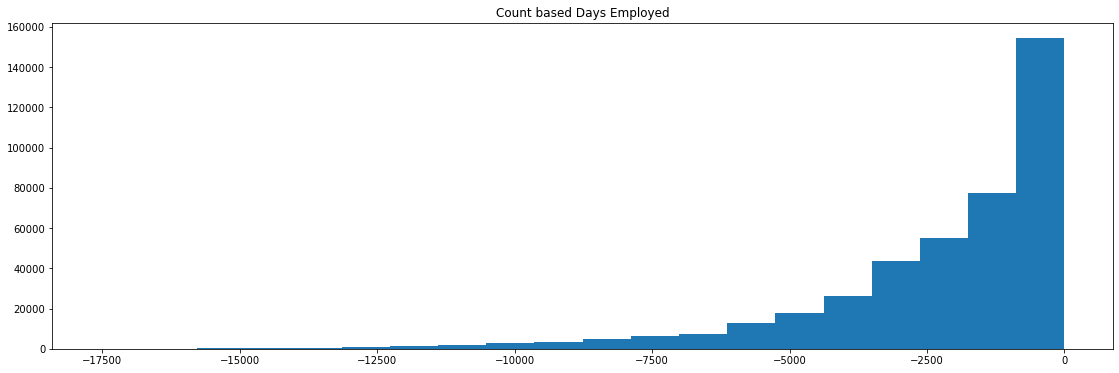

In [72]:
#Visalization of DAYS_EMPLOYED column
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['DAYS_EMPLOYED'],bins='sturges')
plt.title('Count based Days Employed')
plt.show()

In [73]:
#Replacing null values with median as data is slightly skewed
df_creditcard['DAYS_EMPLOYED'].replace(to_replace=np.NaN,value=df_creditcard['DAYS_EMPLOYED'].median(),inplace=True)

In [74]:
##Converting 'DAYS_EMPLOYED' values from Day to Years
df_creditcard['DAYS_EMPLOYED'] = abs(round(df_creditcard['DAYS_EMPLOYED']/-365,0))
df_creditcard.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 

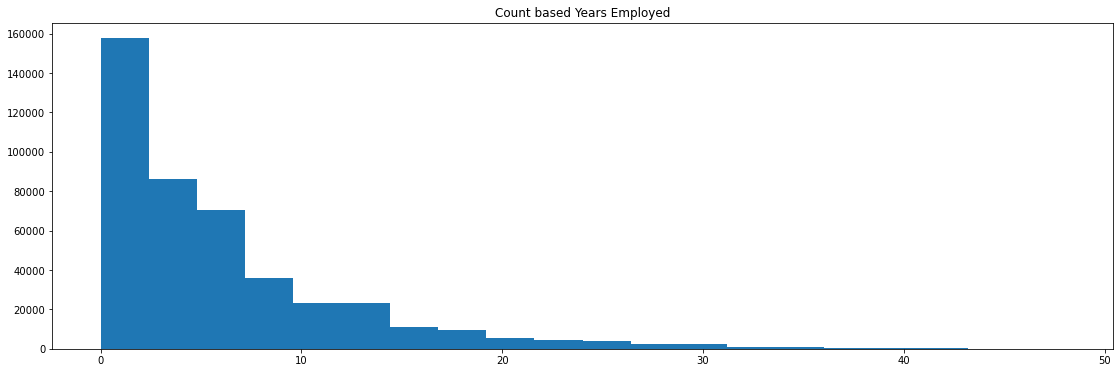

In [75]:
#Visulization after converting to years
plt.figure(figsize=(19,6))
plt.hist(df_creditcard['YEARS_EMPLOYED'],bins='sturges')
plt.title('Count based Years Employed')
plt.show()

In [76]:
#FLAG_MOBIL Column
df_creditcard['FLAG_MOBIL'].value_counts()

1.0    416527
Name: FLAG_MOBIL, dtype: int64

In [77]:
df_creditcard['FLAG_MOBIL'].isna().sum()

22030

In [78]:
#All the values of this column are 1, so dropping the column all together
df_creditcard.drop('FLAG_MOBIL', axis=1, inplace=True)

In [79]:
# FLAG_WORK_PHONE Column
df_creditcard['FLAG_WORK_PHONE'].value_counts()

0.0    331298
1.0     85725
Name: FLAG_WORK_PHONE, dtype: int64

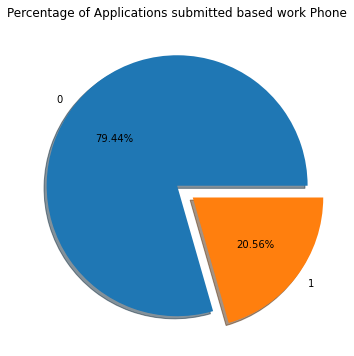

In [80]:
#Visulization of FLAG_WORK_PHONE
plt.figure(figsize=(6,6))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_WORK_PHONE'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based work Phone')
plt.show()

In [81]:
df_creditcard['FLAG_WORK_PHONE'].isna().sum()

21534

In [82]:
#Replcing null values with 0
df_creditcard['FLAG_WORK_PHONE'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_WORK_PHONE'].isna().sum()

0

In [83]:
#FLAG_PHONE
df_creditcard['FLAG_PHONE'].value_counts()

0.0    297661
1.0    120076
Name: FLAG_PHONE, dtype: int64

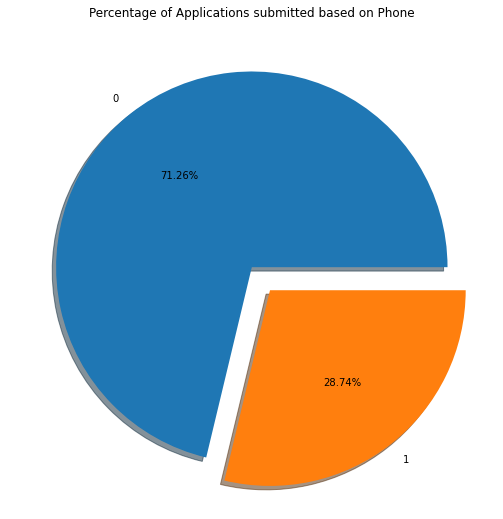

In [84]:
#Visulization of FLAG_PHONE
plt.figure(figsize=(9,9))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_PHONE'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Phone')
plt.show()

In [85]:
df_creditcard['FLAG_PHONE'].isna().sum()

20820

In [86]:
#Replcing null values with 0
df_creditcard['FLAG_PHONE'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_PHONE'].isna().sum()

0

In [87]:
#Checking for Email
df_creditcard['FLAG_EMAIL'].value_counts()

0.0    372529
1.0     45374
Name: FLAG_EMAIL, dtype: int64

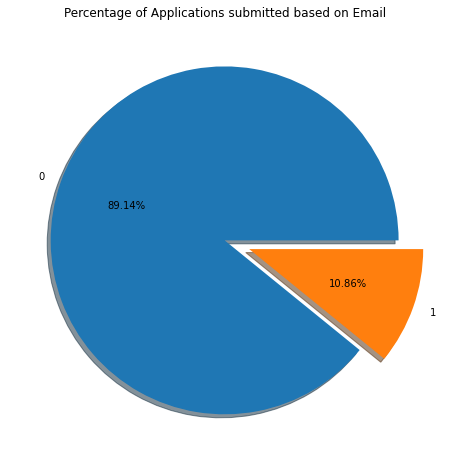

In [88]:
#Visulization of FLAG_EMAIL
plt.figure(figsize=(8,8))
explode =[0.0, 0.15]
plt.pie(df_creditcard['FLAG_EMAIL'].value_counts(), labels=['0', '1'], explode=explode, shadow= 0.2,autopct='%1.2f%%')
plt.title('Percentage of Applications submitted based on Email')
plt.show()

In [89]:
df_creditcard['FLAG_EMAIL'].isna().sum()

20654

In [90]:
#Replcing null values with 0
df_creditcard['FLAG_EMAIL'].replace(to_replace=np.NaN,value='0',inplace=True)
#Checking values after replcing
df_creditcard['FLAG_EMAIL'].isna().sum()

0

In [91]:
#OCCUPATION_TYPE column
df_creditcard['OCCUPATION_TYPE'].value_counts()

Laborers                 78151
Core staff               42934
Sales staff              41000
Managers                 35406
Drivers                  26073
High skill tech staff    17253
Accountants              15939
Medicine staff           13512
Cooking staff             8055
Security staff            7979
Cleaning staff            5839
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2043
Waiters/barmen staff      1654
Realty agents             1041
HR staff                   774
IT staff                   583
Name: OCCUPATION_TYPE, dtype: int64

In [92]:
df_creditcard['OCCUPATION_TYPE'].isna().sum()

134725

In [93]:
#Percentage of missing values in occupation type 
print("Missing %",(df_creditcard['OCCUPATION_TYPE'].isna().sum()/df_creditcard.shape[0]*100))

Missing % 30.72006603474577


In [94]:
# we are dropping the column OCCUPATION_TYPE as the column values are little less significant when comes to determinin if a person is defaulter.
df_creditcard.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [95]:
#CNT_FAM_MEMBERS column
df_creditcard['CNT_FAM_MEMBERS'].value_counts()

2     233891
1      84492
3      77128
4      37356
5       5081
6        459
7        124
9          9
11         5
14         4
8          4
15         3
20         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [96]:
#Checking for missing values- no missing values
df_creditcard['CNT_FAM_MEMBERS'].isna().sum()

0

In [97]:
df_creditcard.isna().sum()

ID                                                   0
CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
YEARS                                                0
YEARS_EMPLOYED                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCA

In [98]:
#Now working on df_cardrecord
df_cardrecord.shape

(1048575, 3)

In [99]:
df_cardrecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [100]:
#Checking for nulls
df_cardrecord.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [101]:
#Checking the Status column
df_cardrecord['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [102]:
#Let's Assume that 0: Good Client and 1: Bad client
df_cardrecord['STATUS'].replace(['C', 'X'],0, inplace=True)
df_cardrecord['STATUS'].replace(['2','3','4','5'],1, inplace=True)
df_cardrecord['STATUS'] = df_cardrecord['STATUS'].astype('int')
df_cardrecord['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [103]:
#Grouping by column and storing in another dataframe
df_cardrecord_trans = df_cardrecord.groupby('ID').agg(max).reset_index()

In [104]:
#we are dropping the month balance
df_cardrecord_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
df_cardrecord_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [105]:
#Normalizing Status column
df_cardrecord_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

In [106]:
#Now merging both the dataframes on ID using Inner Join
df_classification = pd.merge(df_creditcard, df_cardrecord_trans, on='ID', how='inner')
df_classification.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS
0,5008804,0,0,1,0.0,427500.0,33.0,12.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1,5008805,0,0,1,0.0,427500.0,33.0,12.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,5008806,0,0,1,0.0,112500.0,59.0,3.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,5008808,1,1,1,0.0,270000.0,52.0,8.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,0
4,5008809,1,1,1,0.0,270000.0,52.0,8.0,0.0,1.0,...,0,1,0,0,1,0,0,0,0,0


In [107]:
#Checking the number of rows and columns after merging
print("Number of rows after merging",df_classification.shape[0])
print("Number of Columns after merging",df_classification.shape[1])

Number of rows after merging 36457
Number of Columns after merging 34


In [108]:
#We are dropping ID as they are unique values 
df_classification.drop('ID',axis=1, inplace=True)

In [109]:
#Checking if there are any duplicates
len(df_classification) - len(df_classification.drop_duplicates())

26109

In [110]:
#Dropping duplicate records and checking shape
df_classification = df_classification.drop_duplicates()
df_classification.reset_index(drop=True ,inplace=True)
df_classification.shape

(10348, 33)

In [111]:
#Checking for nulls
df_classification.isnull().sum()

CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
YEARS                                                0
YEARS_EMPLOYED                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCA

In [112]:
df_classification['STATUS'].value_counts(normalize=True)*100

0    78.536915
1    21.463085
Name: STATUS, dtype: float64

In [113]:
df_classification =df_classification.sample(n=3000)

In [114]:
df_classification.shape


(3000, 33)

In [115]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6179 to 8837
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CODE_GENDER                                        3000 non-null   object 
 1   FLAG_OWN_CAR                                       3000 non-null   int32  
 2   FLAG_OWN_REALTY                                    3000 non-null   object 
 3   CNT_CHILDREN                                       3000 non-null   float64
 4   AMT_INCOME_TOTAL                                   3000 non-null   float64
 5   YEARS                                              3000 non-null   float64
 6   YEARS_EMPLOYED                                     3000 non-null   float64
 7   FLAG_WORK_PHONE                                    3000 non-null   object 
 8   FLAG_PHONE                                         3000 non-null   object 
 9   FLAG_

In [116]:
# KNN Classifier
#We are using min max Scalar
#First used grid search in order to find out the best parameters and then fit the model using those scores and then print out test and train scores
#We take the 'STATUS' as the target column and est all as the feature columns
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

#We split the training and test data; we take the test data and training data as default values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#using min max scaler we scale the values and then transform the values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
#Using KNN Classification, we are not applying any parameter , so by default it takes k as 5
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [118]:
#Predicting y 
y_pred=knn.predict(X_test)

In [120]:
#Testing the accuracy score
print('The accuracy for KNN-default is',accuracy_score(y_test, y_pred))

The accuracy for KNN-default is 0.756


In [121]:
#We use grid search and best parameters to see the best n value for KNN
param_dist={
    "weights":["uniform"],
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["minkowski", "manhattan","euclidean","cosine"]
}
grid=GridSearchCV(knn, param_grid=param_dist, cv=5, n_jobs=-1,scoring='roc_auc')


In [122]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean',
                                    'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform']})

In [123]:
#Taking the best n_neighbor using grid method
grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [124]:
#Taking the best score using grid method
grid.best_score_

0.772

In [125]:
#hyper parameter tunning
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}

In [126]:
# now fitting the model with best parameters
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=10, weights='uniform')
knn.fit(X_train,y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7782
Test score: 0.7907


In [127]:
#We can also do using graph
#Taking the train and test data set and using min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [128]:
#Checking the best n_neighbour value 
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

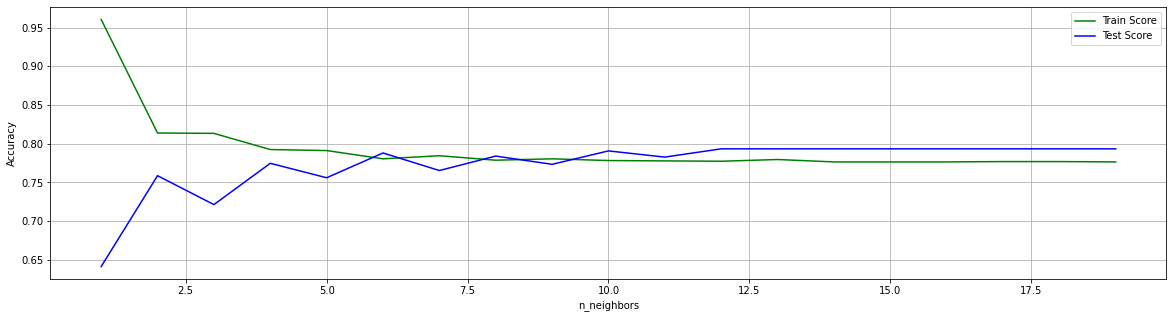

In [129]:
#Plotting the graph and visulaizing the best n_neighbour parameter
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [130]:
# At n= 10 we see the best n parameter

In [131]:
#From the above grph we see that the best value of n_neighbour(k) = 10; substituting k =10 in KNN and va;idating the train and test score 
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7782
Test score: 0.7907


In [132]:
#Predicting y based on X test data
y_pred_knn =knn.predict(X_test)

In [133]:
#Calculating accuracy score
accuracy_score(y_pred_knn,y_test)

0.7906666666666666

In [134]:
#Printing Classification re[port]
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       748
           1       0.00      0.00      0.00         2

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       0.99      0.79      0.88       750



In [135]:
#printing confusion matrix
print(confusion_matrix(y_pred_knn,y_test))

[[593 155]
 [  2   0]]


In [136]:
#Logistic Regression
#'STATUS' is out target column and rest are feture columns; Splitting data into train and test datasets and applying Min Max Scaler
#'STATUS' is out target column and rest are feture columns; Splitting data into train and test datasets and applying Min Max Scaler

X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

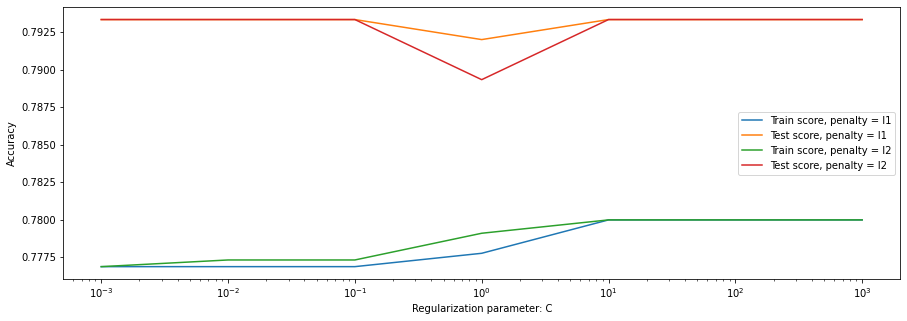

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [139]:
#The best c parameter as per graph is c=0.01
#Using hypterparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lreg = LogisticRegression(random_state = 0, max_iter = 1000)
grid_lreg = GridSearchCV(lreg, param_grid, cv =5, scoring= 'roc_auc')
grid_lreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [140]:
#Predicting the score
grid_lreg.score(X_test, y_test)

0.519387367850366

In [141]:
from sklearn.metrics import accuracy_score, roc_auc_score

#Predicting y
y_pred = grid_lreg.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, grid_lreg.predict_proba(X_test)[:,1]))

accuracy_score:  0.7933333333333333
roc_auc_score:  0.519387367850366


In [142]:
#Predicting Y
y_pred_lreg =grid_lreg.predict(X_test)

In [143]:
#Printing Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_lreg,y_test))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       742
           1       0.03      0.50      0.05         8

    accuracy                           0.79       750
   macro avg       0.51      0.65      0.47       750
weighted avg       0.98      0.79      0.88       750



In [144]:
#Confusion matrix
print(confusion_matrix(y_pred_lreg,y_test))

[[591 151]
 [  4   4]]


In [145]:
#Linear SVC
#Splitting data into train and test and applying min max scalar
#Splitting data into train and test and applying min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
#Appying Linear SVC and fitting training data
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC()

In [147]:
#Predicting y using test dataset
y_pred=svc.predict(X_test)

In [148]:
#Predicting accuracy
accuracy_score(y_test, y_pred)

0.7933333333333333

In [149]:
#Predicting the y values
y_pred_svc =svc.predict(X_test)

In [150]:
#Printing Classification report
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       748
           1       0.01      0.50      0.01         2

    accuracy                           0.79       750
   macro avg       0.50      0.65      0.45       750
weighted avg       1.00      0.79      0.88       750



In [151]:
#printing confusion matrix
print(confusion_matrix(y_pred_svc,y_test))

[[594 154]
 [  1   1]]


#### Applying hyper-tuning
#### We are using Grid Search with CV

In [152]:
#Applying hyper-tuning
# We are using Grid Search with CV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)


Best score on validation set: 0.78
Best parameters:  {'C': 0.001, 'gamma': 0.001}


In [153]:
test_score = svm.score(X_test, y_test)
print(test_score)

0.7933333333333333


In [154]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True,scoring= 'roc_auc')
grid_search.fit(X_train, y_train)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [155]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.78


In [156]:
#finding train and test scores for best parameters
svm = SVC(gamma=0.001, C=0.001)
svm.fit(X_train, y_train)

print('Train score: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svm.score(X_test, y_test)))

Train score: 0.7769
Test score: 0.7933


In [157]:
y_pred_sv =svm.predict(X_test)
accuracy_score(y_pred_sv,y_test)

0.7933333333333333

In [158]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [159]:
#Confusion matrix
print(confusion_matrix(y_pred_sv,y_test))

[[595 155]
 [  0   0]]


## SVC with kernel trick
### ``kernel = 'poly'``

In [160]:
# splitting into train and test data
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
clf = SVC(kernel = 'poly')
clf.fit(X_train,y_train)    
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.792

In [162]:
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
from sklearn.model_selection import GridSearchCV
grid_poly=GridSearchCV(clf, param_grid=param_dist, cv=5, n_jobs=-1,scoring= 'roc_auc')

In [163]:
grid_poly.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [10, 50, 100, 150, 200, 250, 300, 350, 400,
                                      450, 500]})

In [164]:
grid_poly.best_estimator_

SVC(C=0.001, gamma=0.001, kernel='poly', max_iter=450)

In [165]:
grid_poly.best_score_

0.776888888888889

In [166]:
# printing the best parameters
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}
Best cross-validation score: 0.78


In [167]:
#Predicting y from X_test
y_pred_grid_poly =grid_poly.predict(X_test)

In [168]:
#Accuracy Score
accuracy_score(y_pred_grid_poly,y_test)

0.5093333333333333

In [169]:
#Classification report
print(classification_report(y_pred_grid_poly,y_test))
#Confusion Matrix
print(confusion_matrix(y_pred_grid_poly,y_test))

              precision    recall  f1-score   support

           0       0.53      0.78      0.63       409
           1       0.41      0.19      0.26       341

    accuracy                           0.51       750
   macro avg       0.47      0.48      0.45       750
weighted avg       0.48      0.51      0.46       750

[[318  91]
 [277  64]]


# Svc Kernel -rbf
### splitting the dataset into train and test and applying min max scalar


In [170]:
# splitting the dataset into train and test and applying min max scalar
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
# accuracy score
clf_rbf = SVC(kernel = 'rbf')
clf_rbf.fit(X_train,y_train)
y_pred=clf_rbf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7933333333333333

In [172]:
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid=GridSearchCV(clf_rbf, param_grid=param_dist, cv=5, n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print(grid.best_score_)

SVC(C=0.001, gamma=0.001, max_iter=450)
0.776888888888889


In [173]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}


In [174]:
#Predicting y values
y_pred_grid =grid.predict(X_test)

In [175]:
#Accuracy Score
accuracy_score(y_pred_grid,y_test)

0.6053333333333333

In [176]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_grid,y_test))


              precision    recall  f1-score   support

           0       0.68      0.80      0.73       505
           1       0.34      0.21      0.26       245

    accuracy                           0.61       750
   macro avg       0.51      0.50      0.50       750
weighted avg       0.56      0.61      0.58       750



In [177]:
#Confusion Matrix
print(confusion_matrix(y_pred_grid,y_test))

[[402 103]
 [193  52]]


# SVC Kernel -Linear

In [178]:
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf_lin = SVC(kernel = 'linear')
clf_lin.fit(X_train,y_train)
y_pred=clf_lin.predict(X_test)
accuracy_score(y_test, y_pred)


0.7933333333333333

### Using Hyper Tuning

In [179]:
#Using Hyper Tuning
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid_svc_hp=GridSearchCV(clf_lin, param_grid=param_dist, cv=5, n_jobs=-1)
grid_svc_hp.fit(X_train,y_train)
print(grid_svc_hp.best_estimator_)
print(grid_svc_hp.best_score_)
print("Best parameters: {}".format(grid_svc_hp.best_params_))

SVC(C=0.001, gamma=0.001, kernel='linear', max_iter=450)
0.776888888888889
Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}


In [180]:
#Predicting y
y_pred_svc_hp =grid_svc_hp.predict(X_test)
#Accuracy Score
accuracy_score(y_pred_svc_hp,y_test)

0.656

In [181]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_svc_hp,y_test))
#Confusion Report
print(confusion_matrix(y_pred_svc_hp,y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       569
           1       0.25      0.22      0.23       181

    accuracy                           0.66       750
   macro avg       0.51      0.51      0.51       750
weighted avg       0.64      0.66      0.65       750

[[453 116]
 [142  39]]


# Decision Tree
## splitting data into train and test and applied grid search in order to find out the best estimator

In [182]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.64

In [183]:
#Predicting y without hyper parameter tuning
y_pred_tree =tree.predict(X_test)

In [184]:
#Accuracy Score
accuracy_score(y_pred_tree,y_test)

0.64

In [185]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       575
           1       0.19      0.17      0.18       175

    accuracy                           0.64       750
   macro avg       0.47      0.48      0.48       750
weighted avg       0.62      0.64      0.63       750



In [186]:
#Confusion report
print(confusion_matrix(y_pred_tree,y_test))

[[450 125]
 [145  30]]


### Decision Tree with Hyper-parameters

In [187]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7]
}
from sklearn.model_selection import GridSearchCV
grid_tree=GridSearchCV(tree, param_grid=param_dist, cv=10, n_jobs=-1)
grid_tree.fit(X_train,y_train)
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [188]:
grid_tree.best_score_

0.776888888888889

In [189]:
#hyper parameter tunning
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [190]:
dtree = DecisionTreeClassifier(max_depth=1, criterion = 'gini')
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.793


In [191]:
# Predicting y
y_pred_dtree =dtree.predict(X_test)

In [192]:
#Accuracy Score
accuracy_score(y_pred_dtree,y_test)

0.7933333333333333

In [193]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_dtree,y_test))
#Confusion matrix
print(confusion_matrix(y_pred_dtree,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750

[[595 155]
 [  0   0]]


## Decision Tree Diagram

[Text(167.4, 163.07999999999998, 'X[4] <= 68436.0\ngini = 0.347\nsamples = 2250\nvalue = [1748, 502]'),
 Text(83.7, 54.360000000000014, 'gini = 0.245\nsamples = 119\nvalue = [102, 17]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.352\nsamples = 2131\nvalue = [1646, 485]')]

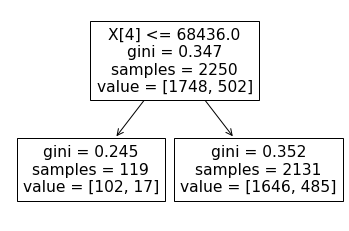

In [194]:
from sklearn import tree
tree.plot_tree(dtree)

# Softmax Regression

In [195]:
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000)
softmax_reg.fit(X_train, y_train)


print('Train score: {:.4f}'.format(softmax_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(softmax_reg.score(X_test, y_test)))

Train score: 0.7773
Test score: 0.7920


In [197]:
y_pred=softmax_reg.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.792

In [199]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       747
           1       0.01      0.33      0.01         3

    accuracy                           0.79       750
   macro avg       0.50      0.56      0.45       750
weighted avg       0.99      0.79      0.88       750



In [200]:
#Confusion matrix
print(confusion_matrix(y_pred,y_test))

[[593 154]
 [  2   1]]


## We have KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. The cumulative results are given below


In [201]:
result= pd.read_excel("Results.xlsx")
result

,Sno.,1,2,3,4,5,6,7,8,9,10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Model Name,KNN Classifier-HP,Logistic Regression-HP,Linear SVC,Linear SVC-HP,SVC Poly-HP,SVC -RBF-HP,SVC -Kernel Linear-HP,Decision tree,Decision tree_Hp,Softmax Regression-Hp,Voting- Hard- Decision Tree,Voting - Hard- SVC poly,Voting - Soft- Decision Tree,Bagging - Decision Tree,Pasting Decision tree,Bagging - Logistc Regression,Pasting - Logistic Regression,Ada Boosting-Decision Tree,Ada Boosting - Softmax,Gradient Boosting -,PCA- KNN,PCA-Logistic Regression,PCA- SVC Linear kernel,PCA- SVC Poly,PCA- SVC RBF,PCA- SVC kernel-Linear- HP,PCA -Decision Tree,PCA - Softmax
1,Accuracy Score,0.781333,0.788,0.788,0.788,0.7866,0.806,0.455,0.625,0.77,0.788,0.7733,0.233,0.7733,0.77,0.77,0.77,0.77,NaN,NaN,NaN,0.752,0.604,0.7733,0.268,0.6688,0.541,0.773,NaN
2,Recall- Weighted avg,0.78,0.79,0.79,0.79,0.44,0.59,0.45,0.63,0.79,0.79,0.77,0.23,0.77,0.77,0.77,0.77,0.77,0.76,0.77,NaN,0.753,0.604,0.77,0.27,0.678,0.54,0.77,0.8
3,Precision- Weighted,0.98,1,1,1,0.56,0.55,0.59,0.6,1,1,1,0.98,1,1,1,1,1,0.96,1,NaN,0.93,0.57,1,0.93,0.65,0.5,1,1
4,Recall-Macro Avg,0.39,0.39,0.39,0.39,0.52,0.47,0.53,0.48,0.39,0.39,0.39,0.54,0.39,0.39,0.39,0.39,0.39,0.49,0.39,NaN,0.47,0.52,0.39,0.54,0.51,0.48,0.39,0.4


# Project 1

### Dataset
For our Project we took two datasets and for Classification, we took the dataset of Credit Card Application from Kaggle.
There were two CSV files: Credit_card_application.csv and credit_record.csv which we combined to create one dataset.

These are the insights of the combined dataset before pre processing

- There were total 21 columns 
- There were 438558 instances (rows)
- There were 6 Categorical columns.
- There were 3 Oridanl Columns.
- 5%-10% of the dataset was missing.

The dataset was huge. We imputed the dataset with median and mean after checking the skewness of the dataset. We visualized
the dataset using bar charts, histogram and pie charts.

### Cleaning Process:

The dataset was huge therefore, it took a lot of preprocessing. The values were imputed on the basis of mean and median after visualizing and checking the skewness. We imputed categorical/ordinal values on the basis of count. In the end, we took a sample of 3000 rows out of 38558 dataset because it was huge.
 

### Classification models:

We ran different types of classification models such as:

#### Knn Classifier:

- We ran Knn Classifier on Grid Search and the best parameters that we received KNeighborsClassifier(metric='manhattan',       - n_neighbors=10)
- we received the train and test scores as follows:
- Train score: 0.7817
- Test score: 0.7933

#### Logistic Regressor:
- We ran Logistic Regressor on Grid Search and the best parameters that we received is - GridSearchCV(cv=5,estimator=LogisticRegression(max_iter=1000, random_state=0), param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

- we received scores as follows:
- accuracy_score:  0.815
- roc_auc_score:  0.46424031393356546

#### Linear SVC:
- We ran Linear SVC on Grid Search and the best parameters that we received is Best parameters: {'C': 0.001, 'gamma': 0.001}
- Best cross-validation score: 0.78.
- we received the train and test scores as follows:
- Train score: 0.7779
- Test score: 0.8150

#### SVC Kernel Poly:
- We ran GridSearchCV on SVC kernel Poly in order to find the best parameters. We received these as follows:
- Best parameters: {'C': 0.001, 'gamma': 0.001}
- Best cross-validation score: 0.78

#### SVC rbf:
- We ran GridSearchCV on SVC rbf in order to find the best parameters. We received these as follows:
- SVC(C=0.001, gamma=0.001, max_iter=450)
- best score: 0.7779166666666667

#### SVC Kernel -  linear:
We hyper tuned this model in order to find the best parameters
- best score: 0.779166666666667
- Best parameters: {'C': 0.001, 'gamma': 0.001}

#### Decision Tree :
We ran Grid Search on Decision Tree in order to find the maximum depth and best parameters
- Best Parameters:  {'criterion': 'gini', 'max_depth': 1}


We have KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. The best accuracy score as per recall is for SVC with kernel =Linear with hyperparamter tuning.

Confusion Matrix
[[221  46]
 [370 113]]
 
113 good clients were predicted correctly


# This is Start of project 2

##Voting Classifier

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [203]:
#We take the 'STATUS' as the target column and est all as the feature columns
X = df_classification.drop('STATUS', axis = 1)
y = df_classification['STATUS']

In [204]:
#Scaling using standard scalar
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [205]:
#Cheking the number of rows and columns in training data set
X_train.shape

(2250, 32)

In [206]:
#Cheking the number of rows and columns in testing data set
X_test.shape

(750, 32)

In [207]:
#Hot vector encoding- We are using DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dt_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
for clf in (dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.7933
VotingClassifier 0.7933


In [208]:
#Classification Report
y_pred_voting_clf =voting_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_voting_clf,y_test))


              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [209]:
#Confusion metrix
print(confusion_matrix(y_pred_voting_clf,y_test))

[[595 155]
 [  0   0]]


In [210]:
#We have used SVC -Poly
svm_clf = SVC(kernel='poly',C= 0.001, gamma= 0.001, max_iter= 450,random_state= 0)
svm_clf.fit(X_train, y_train)

voting_clf_1 = VotingClassifier(estimators=[('svc', svm_clf)], voting='hard')
voting_clf_1.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf1 in (svm_clf, voting_clf_1):
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    print(clf1.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

SVC 0.2133
VotingClassifier 0.2133


In [211]:
#Classification Report
y_pred_voting_clf1 =voting_clf_1.predict(X_test)
print(classification_report(y_pred_voting_clf1,y_test))

              precision    recall  f1-score   support

           0       0.02      0.69      0.03        13
           1       0.97      0.20      0.34       737

    accuracy                           0.21       750
   macro avg       0.49      0.45      0.18       750
weighted avg       0.96      0.21      0.33       750



In [212]:
#Confusion Matrix
print(confusion_matrix(y_pred_voting_clf1,y_test))

[[  9   4]
 [586 151]]


##Applying Soft Voting

In [213]:
#For soft voting we are using Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dt_clf.fit(X_train, y_train)


voting_clf2 = VotingClassifier(estimators=[('dt', dt_clf)], voting='soft')
voting_clf2.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (dt_clf, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.7933
VotingClassifier 0.7933


In [214]:
#Classification report
y_pred_soft =voting_clf2.predict(X_test)
print(classification_report(y_pred_soft,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [215]:
print(confusion_matrix(y_pred_soft,y_test))

[[595 155]
 [  0   0]]


##Bagging and Pasting

In [216]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# bagging: bootstrap = True
# pasting: bootstrap = False


In [217]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              'bootstrap':[False]}

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state = 0))
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                               random_state=0)),
             n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [218]:
#These are best parameters for bootstrap =False, that is these are used for pasting of Decision tree
bag_grid.best_params_

{'bootstrap': False,
 'max_features': 0.1,
 'max_samples': 0.1,
 'n_estimators': 200}

In [219]:
#Selecting best parameters for boosting for decision tree
param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              'bootstrap':[True]}

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state = 0))
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                               random_state=0)),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': [0.1, 0.2, 0.3, 0.5],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [200, 300, 400, 500]})

In [220]:
bag_grid.best_params_

{'bootstrap': True,
 'max_features': 0.1,
 'max_samples': 0.1,
 'n_estimators': 200}

In [221]:
#Bagging with base model as Decision Tree Classifier 
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state = 0), 
                           bootstrap= True,
                           max_features= 0.1,
                           max_samples= 0.1,
                           n_estimators= 200, 
                           oob_score= True)

In [222]:
from  sklearn.metrics import accuracy_score
bag_clf.fit(X_train, y_train)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train score: 0.78
Test score: 0.79
Out-of-bag score: 0.78


In [223]:
#Classification report
y_pred_bag1=bag_clf.predict(X_test)
print(classification_report(y_pred_bag1,y_test))
#Confusion Matrix
print(confusion_matrix(y_pred_bag1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750

[[595 155]
 [  0   0]]


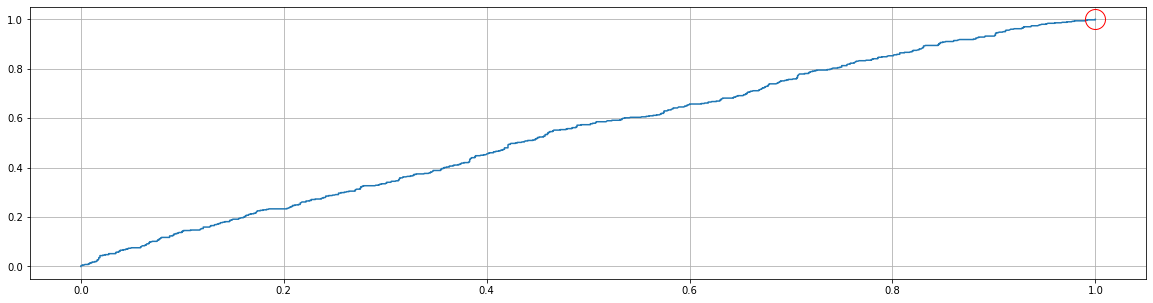

In [224]:
%matplotlib inline

from sklearn.metrics import roc_curve

fpr, recall, threshold = roc_curve(y_train, bag_clf.predict_proba(X_train)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 20, marker = 'o')

plt.grid()

In [225]:
#Pasting using Decision Tree
bag_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state = 0), 
                           bootstrap= False,
                           max_features= 0.1,
                           max_samples= 0.1,
                           n_estimators= 200)

In [226]:
bag_clf1.fit(X_train, y_train)

print('Train score: %.2f'%bag_clf1.score(X_train, y_train))
print('Test score: %.2f'%bag_clf1.score(X_test, y_test))

Train score: 0.78
Test score: 0.79


In [227]:
#Classification report
y_pred_bag2=bag_clf1.predict(X_test)
print(classification_report(y_pred_bag2,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [228]:
#Confusion Matrix
print(confusion_matrix(y_pred_bag2,y_test))

[[595 155]
 [  0   0]]


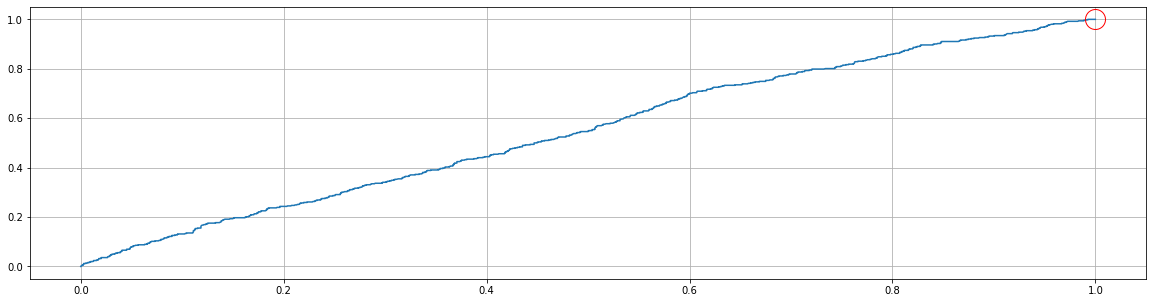

In [229]:
%matplotlib inline

from sklearn.metrics import roc_curve

fpr, recall, threshold = roc_curve(y_train, bag_clf1.predict_proba(X_train)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 20, marker = 'o')

plt.grid()  

In [230]:
##Bagging with base model as Logistic Regression
warnings.filterwarnings('ignore')
param_grid = { 
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5,1],
        'bootstrap':[True]
              }

bag_clf3 = BaggingClassifier(LogisticRegression(solver='lbfgs',penalty='l2',random_state= 0), random_state = 0)
bag_grid_lr = GridSearchCV(bag_clf3, param_grid = param_grid, cv = 5,scoring='precision')
bag_grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                                         random_state=0),
             param_grid={'bootstrap': [True],
                         'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.5, 1]},
             scoring='precision')

In [231]:
bag_grid_lr.best_params_

{'bootstrap': True, 'max_features': 0.5, 'max_samples': 0.01}

In [232]:
log_reg=LogisticRegression(solver='lbfgs',penalty='l2',random_state= 0)
bag_clf3_lr = BaggingClassifier(log_reg,bootstrap= True,max_samples=0.01,max_features=0.01, random_state=0, oob_score = True)

bag_clf3_lr.fit(X_train, y_train)
y_pred = bag_clf3_lr.predict(X_test)

In [233]:
print('Train score: %.4f'%bag_clf3_lr.score(X_train, y_train))
print('Test score: %.4f'%bag_clf3_lr.score(X_test, y_test))
print('Out-of-bag score: %.4f'%bag_clf3_lr.oob_score_)

Train score: 0.7769
Test score: 0.7933
Out-of-bag score: 0.7769


In [234]:
#Classification report
y_pred_bag3 =bag_clf3_lr.predict(X_test)
print(classification_report(y_pred_bag3,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [235]:
#Confusion Matrix
print(confusion_matrix(y_pred_bag3,y_test))

[[595 155]
 [  0   0]]


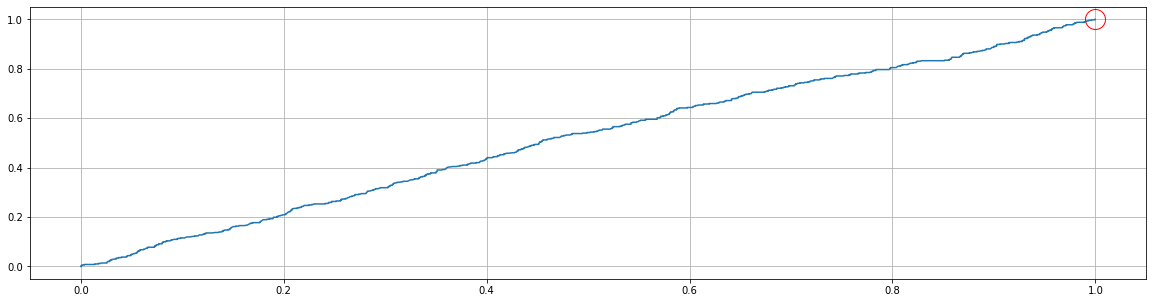

In [236]:
%matplotlib inline

from sklearn.metrics import roc_curve

fpr, recall, threshold = roc_curve(y_train, bag_clf3_lr.predict_proba(X_train)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 20, marker = 'o')

plt.grid()

In [237]:
#Pasting with base model as Logistic regression
warnings.filterwarnings('ignore')
param_grid = { 
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5,1],
        'bootstrap':[False]
              }

bag_clf4 = BaggingClassifier(LogisticRegression(solver='lbfgs',penalty='l2',random_state= 0), random_state = 0)
bag_grid_lr1 = GridSearchCV(bag_clf4, param_grid = param_grid, cv = 5,scoring='precision')
bag_grid_lr1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                                         random_state=0),
             param_grid={'bootstrap': [False],
                         'max_features': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_samples': [0.01, 0.05, 0.1, 0.5, 1]},
             scoring='precision')

In [238]:
bag_grid_lr1.best_params_

{'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.01}

In [239]:
log_reg=LogisticRegression(solver='lbfgs',penalty='l2',random_state= 0)
bag_lr1 = BaggingClassifier(log_reg,bootstrap= False,max_samples=0.01,max_features=0.01, random_state=0)

bag_lr1.fit(X_train, y_train)
y_pred = bag_lr1.predict(X_test)

In [240]:
from  sklearn.metrics import accuracy_score

print('Train score: %.2f'%bag_lr1.score(X_train, y_train))
print('Test score: %.2f'%bag_lr1.score(X_test, y_test))

Train score: 0.78
Test score: 0.79


In [241]:
#Classification Report
y_pred_pas =bag_lr1.predict(X_test)
print(classification_report(y_pred_pas,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [242]:
#Confusion Matrix
print(confusion_matrix(y_pred_pas,y_test))

[[595 155]
 [  0   0]]


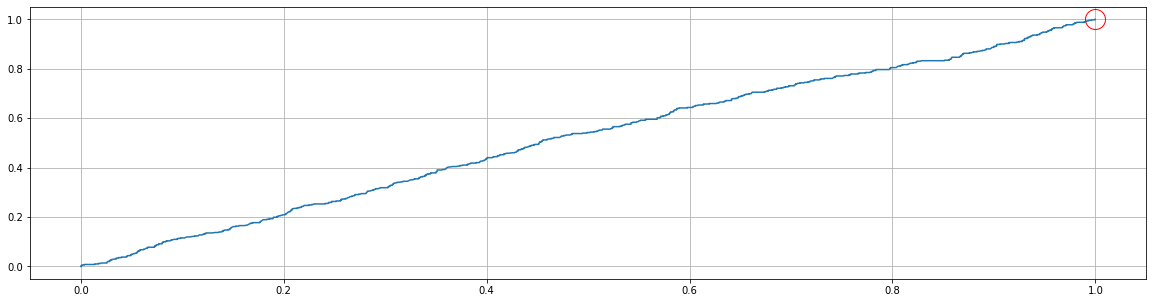

In [243]:
%matplotlib inline

from sklearn.metrics import roc_curve

fpr, recall, threshold = roc_curve(y_train, bag_lr1.predict_proba(X_train)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 20, marker = 'o')

plt.grid()

##Ada Boosting with Decision tree

In [244]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [245]:
dtree_ada=DecisionTreeClassifier(max_depth=1,random_state=0)
param_grids={"n_estimators":[100,200,500],"learning_rate":[0.1,0.5,0.1,1]}
ada=AdaBoostClassifier(dtree_ada,random_state=0)
grid_Ada=GridSearchCV(ada,param_grids,cv=5,scoring="recall")
grid_Ada.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=0),
                                          random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 0.1, 1],
                         'n_estimators': [100, 200, 500]},
             scoring='recall')

In [246]:
y_pred_ada = grid_Ada.predict(X_test)

In [247]:
#Classification report
print(classification_report(y_pred_ada,y_test))
#Confusion matrix
print(confusion_matrix(y_pred_ada,y_test))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       744
           1       0.01      0.17      0.01         6

    accuracy                           0.79       750
   macro avg       0.50      0.48      0.45       750
weighted avg       0.98      0.79      0.87       750

[[590 154]
 [  5   1]]


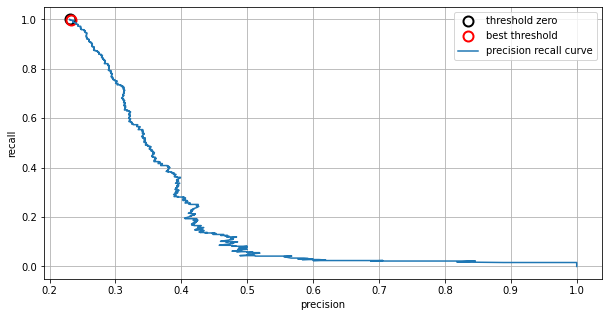

In [248]:
from sklearn.metrics import precision_recall_curve
plt.subplots(figsize=(10,5))
precision,recall,thresholds=precision_recall_curve(y_train,grid_Ada.decision_function(X_train))

close_zero=0

plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c="k",mew=2)

plt.plot(precision[20],recall[20],"o",markersize=10,label="best threshold",fillstyle="none",c="r",mew=2)

plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()

### Ada Boosting with Softmax 

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sm_ada=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000)
param_grids={"n_estimators":[100,200,500],"learning_rate":[0.1,0.5,0.1]}
smada=AdaBoostClassifier(sm_ada,random_state=0)
smgrid_Ada=GridSearchCV(smada,param_grids,cv=5,scoring="recall")
smgrid_Ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10,
                                                                            max_iter=1000,
                                                                            multi_class='multinomial'),
                                          random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='recall')

In [250]:
y_pred_smada = smgrid_Ada.predict(X_test)

In [251]:
#Classification report
print(classification_report(y_pred_smada,y_test))
#Confusion matrix
print(confusion_matrix(y_pred_smada,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750

[[595 155]
 [  0   0]]


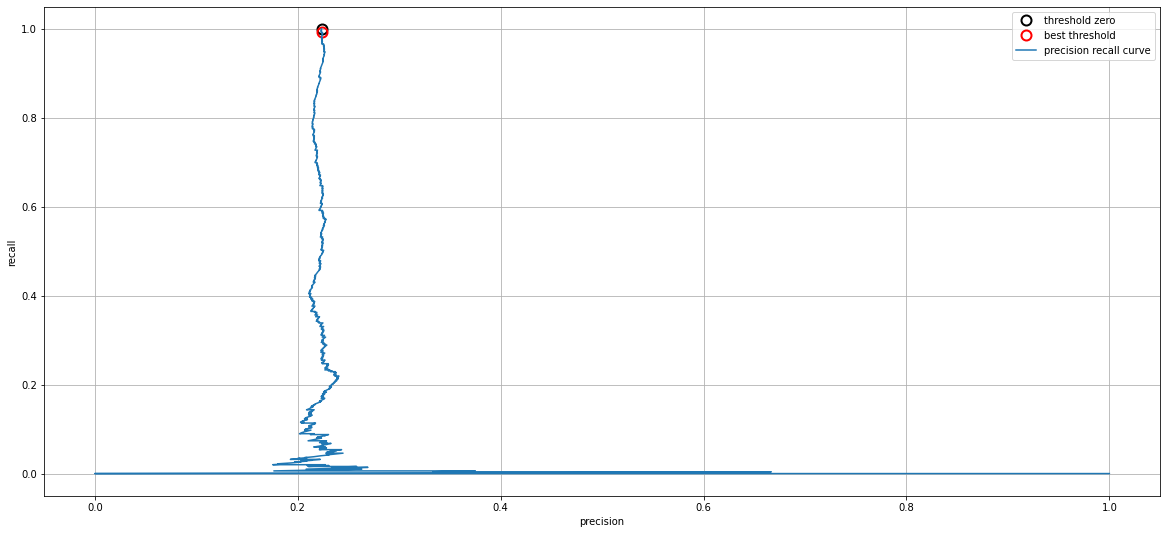

In [252]:
from sklearn.metrics import precision_recall_curve
plt.subplots(figsize=(20,9))
precision,recall,thresholds=precision_recall_curve(y_train,smgrid_Ada.decision_function(X_train))

close_zero=0

plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c="k",mew=2)

plt.plot(precision[20],recall[20],"o",markersize=10,label="best threshold",fillstyle="none",c="r",mew=2)

plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()

### Gradient Boosting

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Using hyperparameters
param_grid_gradient={"learning_rate":[0.1,0.5,1],"max_depth":[1,3,5],"n_estimators":[100,500,1000]}

gradientBoost=GradientBoostingClassifier(random_state=0)
grid_gradient=GridSearchCV(gradientBoost,param_grid_gradient,cv=5,scoring="recall")
grid_gradient.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             scoring='recall')

In [305]:
grid_gradient.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 1000}

In [306]:
grid_gradient.best_score_

0.1333861386138614

In [307]:
y_pred_grid_gradient =grid_gradient.predict(X_test)
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_grid_gradient,y_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       618
           1       0.15      0.17      0.16       132

    accuracy                           0.68       750
   macro avg       0.48      0.48      0.48       750
weighted avg       0.70      0.68      0.69       750



In [308]:
print(confusion_matrix(y_pred_grid_gradient,y_test))

[[486 132]
 [109  23]]


###PCA

###PCA with KNN

In [254]:
from sklearn.decomposition import PCA
#For the PCA we are taking 95% of dimentionality and working on it.
pca = PCA(n_components =0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.components_

array([[-1.13798343e-06, -1.24609114e-06,  6.05546521e-08,
         2.71689752e-07,  1.00000000e+00, -1.18091617e-05,
         5.48205983e-06,  2.89578848e-08,  1.82471338e-07,
         1.91044229e-07,  2.27897317e-07,  7.99871898e-07,
        -7.44201025e-07,  1.77619034e-07, -3.60707631e-09,
        -2.29682830e-07,  0.00000000e+00,  1.20795334e-06,
         8.49482341e-08, -5.40619146e-08, -1.23883966e-06,
        -3.33330018e-08, -1.02350025e-08,  3.09961251e-08,
         1.56997125e-07, -1.44425246e-07, -1.18729862e-08,
         6.00849260e-08, -6.75960434e-09,  6.96369296e-09,
        -3.03937614e-09, -4.53766522e-08]])

In [255]:
X_train_pca.shape

(2250, 1)

In [256]:
#PCA with KNN Classifier; the best parameters have been considered same as Project 1
knn_pca = KNeighborsClassifier(metric='minkowski', n_neighbors=10, weights='uniform')
knn_pca.fit(X_train_pca,y_train)
print('Train score: {:.4f}'.format(knn_pca.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(knn_pca.score(X_test_pca, y_test)))

Train score: 0.7791
Test score: 0.7933


In [257]:
#Predicting y based on X test data
y_pred_knn_pca =knn_pca.predict(X_test_pca)

In [258]:
#Calculating accuracy score
accuracy_score(y_pred_knn_pca,y_test)

0.7933333333333333

In [259]:
#Printing Classification re[port]
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_knn_pca,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       748
           1       0.01      0.50      0.01         2

    accuracy                           0.79       750
   macro avg       0.50      0.65      0.45       750
weighted avg       1.00      0.79      0.88       750



In [260]:
#printing confusion matrix
print(confusion_matrix(y_pred_knn_pca,y_test))

[[594 154]
 [  1   1]]


##PCA Logistic Regression

In [261]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lreg_pca = LogisticRegression(random_state = 0, max_iter = 1000)
grid_lreg_pca = GridSearchCV(lreg_pca, param_grid, cv =5, scoring= 'roc_auc')
grid_lreg_pca.fit(X_train_pca, y_train)
grid_lreg_pca.score(X_test_pca, y_test)

0.4639468690702087

In [262]:
from sklearn.metrics import accuracy_score, roc_auc_score
#Predicting y
y_pred_pca = grid_lreg_pca.predict(X_test_pca)
print('accuracy_score: ', accuracy_score(y_test, y_pred_pca))
print('roc_auc_score: ', roc_auc_score(y_test, grid_lreg_pca.predict_proba(X_test_pca)[:,1]))

accuracy_score:  0.5053333333333333
roc_auc_score:  0.4639468690702087


In [263]:
#Predicting Y
y_pred_lreg_pca =grid_lreg_pca.predict(X_test_pca)

In [264]:
#Printing Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_lreg_pca,y_test))
#Confusion matrix
print(confusion_matrix(y_pred_lreg_pca,y_test))

              precision    recall  f1-score   support

           0       0.52      0.78      0.63       398
           1       0.44      0.19      0.27       352

    accuracy                           0.51       750
   macro avg       0.48      0.49      0.45       750
weighted avg       0.48      0.51      0.46       750

[[311  87]
 [284  68]]


##PCA With Linear Kernel

In [265]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.components_

array([[-3.20245778e-01, -3.51929677e-01, -1.88111915e-01,
         4.24846892e-02,  4.13656065e-02, -1.70974037e-01,
         3.56917910e-02,  1.77146456e-01,  8.89680558e-02,
         4.23712545e-02,  6.24278596e-02,  7.26119219e-02,
        -2.81820115e-01,  9.71279396e-03, -8.81696501e-04,
         2.00377096e-01, -0.00000000e+00,  4.66987886e-01,
         3.94094939e-02,  2.87871518e-03, -5.09276095e-01,
        -3.37439462e-02,  1.96305587e-01, -3.37379788e-02,
        -5.11482083e-02, -7.76754533e-02,  2.48917737e-03,
        -5.78248812e-02, -1.17708328e-03,  3.87447259e-03,
         3.57355554e-03,  4.90647590e-02],
       [ 1.99202143e-01,  1.00832126e-01,  1.37490473e-01,
        -1.67578077e-02,  1.59669314e-02,  7.50720259e-02,
        -3.47509071e-02, -1.96421816e-01, -7.66149870e-02,
         4.72944930e-02, -2.34583704e-02,  3.90436149e-01,
         1.86142755e-01,  6.61377261e-02,  2.83005921e-04,
        -6.42999635e-01, -6.61744490e-24,  3.53741269e-01,
         1.19

In [266]:
svc = LinearSVC()
svc.fit(X_train_pca,y_train)
y_pred_pca=svc.predict(X_test_pca)
#Predicting accuracy
accuracy_score(y_test, y_pred_pca)

0.7933333333333333

In [267]:
#Predicting the y values
y_pred_svc_pca =svc.predict(X_test_pca)

In [268]:
#Printing Classification report
print(classification_report(y_pred_svc_pca,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [269]:
#printing confusion matrix
print(confusion_matrix(y_pred_svc_pca,y_test))

[[595 155]
 [  0   0]]


In [270]:
#PCA On Linear kernel with hyper parameter tuning 
svm1_pca = SVC(gamma=0.001, C=0.001)
svm1_pca.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(svm1_pca.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(svm1_pca.score(X_test_pca, y_test)))

Train score: 0.7769
Test score: 0.7933


In [271]:
y_pred_sv_pca =svm1_pca.predict(X_test_pca)
accuracy_score(y_pred_sv_pca,y_test)

0.7933333333333333

In [272]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_sv_pca,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [273]:
#Confusion matrix
print(confusion_matrix(y_pred_sv_pca,y_test))

[[595 155]
 [  0   0]]


##PCA with SVC Kernel =poly

In [274]:
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
from sklearn.model_selection import GridSearchCV
clf = SVC(kernel = 'poly')
grid_poly_pca=GridSearchCV(clf, param_grid=param_dist, cv=5, n_jobs=-1)
grid_poly_pca.fit(X_train_pca,y_train)
print("Best parameters: {}".format(grid_poly_pca.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly_pca.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}
Best cross-validation score: 0.78


In [275]:
#Predicting y from X_test
y_pred_grid_poly_pca =grid_poly_pca.predict(X_test_pca)
#Accuracy Score
accuracy_score(y_pred_grid_poly_pca,y_test)

0.26666666666666666

In [276]:
#Classification report
print(classification_report(y_pred_grid_poly_pca,y_test))

              precision    recall  f1-score   support

           0       0.11      0.78      0.19        81
           1       0.88      0.20      0.33       669

    accuracy                           0.27       750
   macro avg       0.49      0.49      0.26       750
weighted avg       0.80      0.27      0.32       750



In [277]:
#Confusion Matrix
print(confusion_matrix(y_pred_grid_poly_pca,y_test))

[[ 63  18]
 [532 137]]


###PCA with Kernel RBF

In [278]:
clf_rbf = SVC(kernel = 'rbf')
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid_rbf_pca=GridSearchCV(clf_rbf, param_grid=param_dist, cv=5, n_jobs=-1)
grid_rbf_pca.fit(X_train_pca,y_train)
print(grid_rbf_pca.best_estimator_)
print(grid_rbf_pca.best_score_)

SVC(C=0.001, gamma=0.001, max_iter=450)
0.776888888888889


In [279]:
print("Best parameters: {}".format(grid_rbf_pca.best_params_))
#Predicting y values
y_pred_grid_pca =grid_rbf_pca.predict(X_test_pca)
#Accuracy Score
print(accuracy_score(y_pred_grid_pca,y_test))

Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}
0.44


In [280]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_grid_pca,y_test))
#Confusion Matrix
print(confusion_matrix(y_pred_grid_pca,y_test))

              precision    recall  f1-score   support

           0       0.41      0.78      0.54       317
           1       0.54      0.19      0.29       433

    accuracy                           0.44       750
   macro avg       0.48      0.49      0.41       750
weighted avg       0.49      0.44      0.39       750

[[246  71]
 [349  84]]


###PCA With SVC Kernel -Linear

In [281]:
clf_lin = SVC(kernel = 'linear')
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
param_dist={
    "max_iter":[10,50,100,150,200,250,300,350,400,450,500],
    "C":[0.001, 0.01, 0.1, 1, 10],
    "gamma":[0.001, 0.01, 0.1, 1, 10]
}
grid_svc_lp_pca=GridSearchCV(clf_lin, param_grid=param_dist, cv=5, n_jobs=-1)
grid_svc_lp_pca.fit(X_train_pca,y_train)
print(grid_svc_lp_pca.best_estimator_)
print(grid_svc_lp_pca.best_score_)
print("Best parameters: {}".format(grid_svc_lp_pca.best_params_))

SVC(C=0.001, gamma=0.001, kernel='linear', max_iter=450)
0.776888888888889
Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450}


In [282]:
#Predicting y
y_pred_svc_lp_pca =grid_svc_lp_pca.predict(X_test_pca)
#Accuracy Score
accuracy_score(y_pred_svc_lp_pca,y_test)

0.6386666666666667

In [283]:
#Classification Report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_svc_lp_pca,y_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       550
           1       0.27      0.21      0.24       200

    accuracy                           0.64       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.61      0.64      0.62       750



In [284]:
#Confusion Report
print(confusion_matrix(y_pred_svc_lp_pca,y_test))

[[437 113]
 [158  42]]


##PCA with Decision Tree

In [285]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7]
}
tree = DecisionTreeClassifier()
grid_tree_pca=GridSearchCV(tree, param_grid=param_dist, cv=10, n_jobs=-1)
grid_tree_pca.fit(X_train_pca,y_train)
print(grid_tree_pca.best_estimator_)
print(grid_tree_pca.best_score_)
print(grid_tree_pca.best_params_)


DecisionTreeClassifier(max_depth=3)
0.7764444444444445
{'criterion': 'gini', 'max_depth': 3}


In [335]:
dtree = DecisionTreeClassifier(max_depth=3, criterion = 'gini')
dtree.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 0.781
Accuracy on test set: 0.791


In [336]:
# Predicting y
y_pred_dtree_pca =dtree.predict(X_test_pca)
#Accuracy Score
accuracy_score(y_pred_dtree_pca,y_test)

0.7906666666666666

In [337]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_dtree_pca,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88       748
         1.0       0.00      0.00      0.00         2

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       0.99      0.79      0.88       750



In [289]:
#Confusion matrix
print(confusion_matrix(y_pred_dtree_pca,y_test))

[[593 155]
 [  2   0]]


[Text(167.4, 163.07999999999998, 'X[15] <= 0.742\ngini = 0.347\nsamples = 2250\nvalue = [1748, 502]'),
 Text(83.7, 54.360000000000014, 'gini = 0.344\nsamples = 2237\nvalue = [1743, 494]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]')]

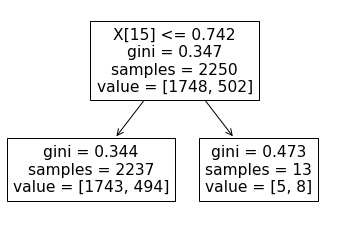

In [290]:
from sklearn import tree
tree.plot_tree(dtree)

##PCA with Softmax 

In [291]:
softmax_reg_pca = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000)
softmax_reg_pca.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(softmax_reg_pca.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(softmax_reg_pca.score(X_test_pca, y_test)))

Train score: 0.7769
Test score: 0.7933


In [292]:
y_pred_sm_pca=softmax_reg_pca.predict(X_test_pca)

In [293]:
#Classification report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_pred_sm_pca,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       750
           1       0.00      0.00      0.00         0

    accuracy                           0.79       750
   macro avg       0.50      0.40      0.44       750
weighted avg       1.00      0.79      0.88       750



In [294]:
#Confusion matrix
print(confusion_matrix(y_pred_sm_pca,y_test))

[[595 155]
 [  0   0]]


##TensorFlow

In [295]:
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Train shape: ", X_train.shape)
print("test shape: ", X_test.shape)

Train shape:  (2250, 32)
test shape:  (750, 32)


In [316]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [297]:
tf.keras.backend.clear_session()

In [324]:
# step 1: build the model'
def create_model():
  model = Sequential()
  model.add(Dense(20, input_dim = 32, activation='relu', kernel_initializer = 'normal', name = 'input_layer'))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
  return model

In [325]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                660       
                                                                 
 dense_4 (Dense)             (None, 16)                336       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1,033
Trainable params: 1,033
Non-trainable params: 0
_________________________________________________________________


In [326]:
model=create_model()

In [327]:
# Step 3: Model training
X_train = np.asarray(X_train).astype(np.float32)
y_train= np.asarray(y_train).astype(np.float32)
model.fit(X_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
18/18 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 8/20
18/18 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 9/20
18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7769
Epoch 10/20
18/18 [==============================] - 0s 3ms/step - loss: 0.0000e+0

In [328]:
# Step 4: Model evaluation

X_test = np.asarray(X_test).astype(np.float32)
y_test= np.asarray(y_test).astype(np.float32)

train_loss_and_metrics = model.evaluate(X_train, y_train)
test_loss_and_metrics = model.evaluate(X_test, y_test)
print()

print("Train Loss", train_loss_and_metrics[0])
print("Train Accuracy", train_loss_and_metrics[1])
print()

print("Test Loss", test_loss_and_metrics[0])
print("Test Accuracy", test_loss_and_metrics[1])

24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7933

Train Loss 0.0
Train Accuracy 0.776888906955719

Test Loss 0.0
Test Accuracy 0.7933333516120911


In [329]:
#Classifucation report
y_pred = model.predict(X_test, batch_size=100, verbose=1)

y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       595
         1.0       0.00      0.00      0.00       155

    accuracy                           0.79       750
   macro avg       0.40      0.50      0.44       750
weighted avg       0.63      0.79      0.70       750



In [330]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred_bool))

[[595   0]
 [155   0]]


In [334]:
predict_x=model.predict(X_test) 
predicted_class=np.argmax(predict_x,axis=1)

h=np.reshape(predicted_class,(-1))
correct_indices=np.nonzero(h==np.array(y_test))[0]
incorrect_indices=np.nonzero(h!=np.array(y_test))[0]
print(len(correct_indices)," are classified correctly")
print(len(incorrect_indices)," are classified incorrectly")

595  are classified correctly
155  are classified incorrectly


In [339]:
#Final Result Compilation
result= pd.read_excel("Results.xlsx")
result

,Model Name,KNN Classifier-HP,Logistic Regression-HP,Linear SVC,Linear SVC-HP,SVC Poly-HP,SVC -RBF-HP,SVC -Kernel Linear-HP,Decision tree,Decision tree_Hp,Softmax Regression-Hp,Voting- Hard- Decision Tree,Voting - Hard- SVC poly,Voting - Soft- Decision Tree,Bagging - Decision Tree,Pasting Decision tree,Bagging - Logistc Regression,Pasting - Logistic Regression,Ada Boosting-Decision Tree,Ada Boosting - Softmax,PCA- KNN,PCA-Logistic Regression,PCA- SVC Linear kernel,PCA- SVC Poly,PCA- SVC RBF,PCA- SVC kernel-Linear- HP,PCA -Decision Tree,PCA - Softmax,Gradient Boosting,Tensorflow
0,Accuracy Score,0.781333,0.788,0.788,0.788,0.7866,0.806,0.455,0.625,0.77,0.788,0.7733,0.233,0.7733,0.77,0.77,0.77,0.77,NaN,NaN,0.752,0.604,0.7733,0.268,0.6688,0.541,0.773,NaN,0.133,NaN
1,Recall- Weighted avg,0.780000,0.790,0.790,0.790,0.4400,0.590,0.450,0.630,0.79,0.790,0.7700,0.230,0.7700,0.77,0.77,0.77,0.77,0.76,0.77,0.753,0.604,0.7700,0.270,0.6780,0.540,0.770,0.8,0.680,NaN
2,Precision- Weighted,0.980000,1.000,1.000,1.000,0.5600,0.550,0.590,0.600,1.00,1.000,1.0000,0.980,1.0000,1.00,1.00,1.00,1.00,0.96,1.00,0.930,0.570,1.0000,0.930,0.6500,0.500,1.000,1.0,0.700,NaN
3,Recall-Macro Avg,0.390000,0.390,0.390,0.390,0.5200,0.470,0.530,0.480,0.39,0.390,0.3900,0.540,0.3900,0.39,0.39,0.39,0.39,0.49,0.39,0.470,0.520,0.3900,0.540,0.5100,0.480,0.390,0.4,0.480,NaN
4,Correctly Predicted,593.000000,595.000,595.000,595.000,382.0000,454.000,492.000,480.000,595.00,594.000,595.0000,160.000,595.0000,595.00,595.00,595.00,595.00,591.00,595.00,595.000,379.000,595.0000,200.000,330.0000,479.000,593.000,595.0,509.000,595.0
5,Incorrectly Predicted,157.000000,155.000,155.000,155.000,368.0000,296.000,258.000,270.000,155.00,156.000,155.0000,590.000,155.0000,155.00,155.00,155.00,155.00,159.00,155.00,155.000,371.000,155.0000,550.000,420.0000,271.000,157.000,155.0,241.000,155.0


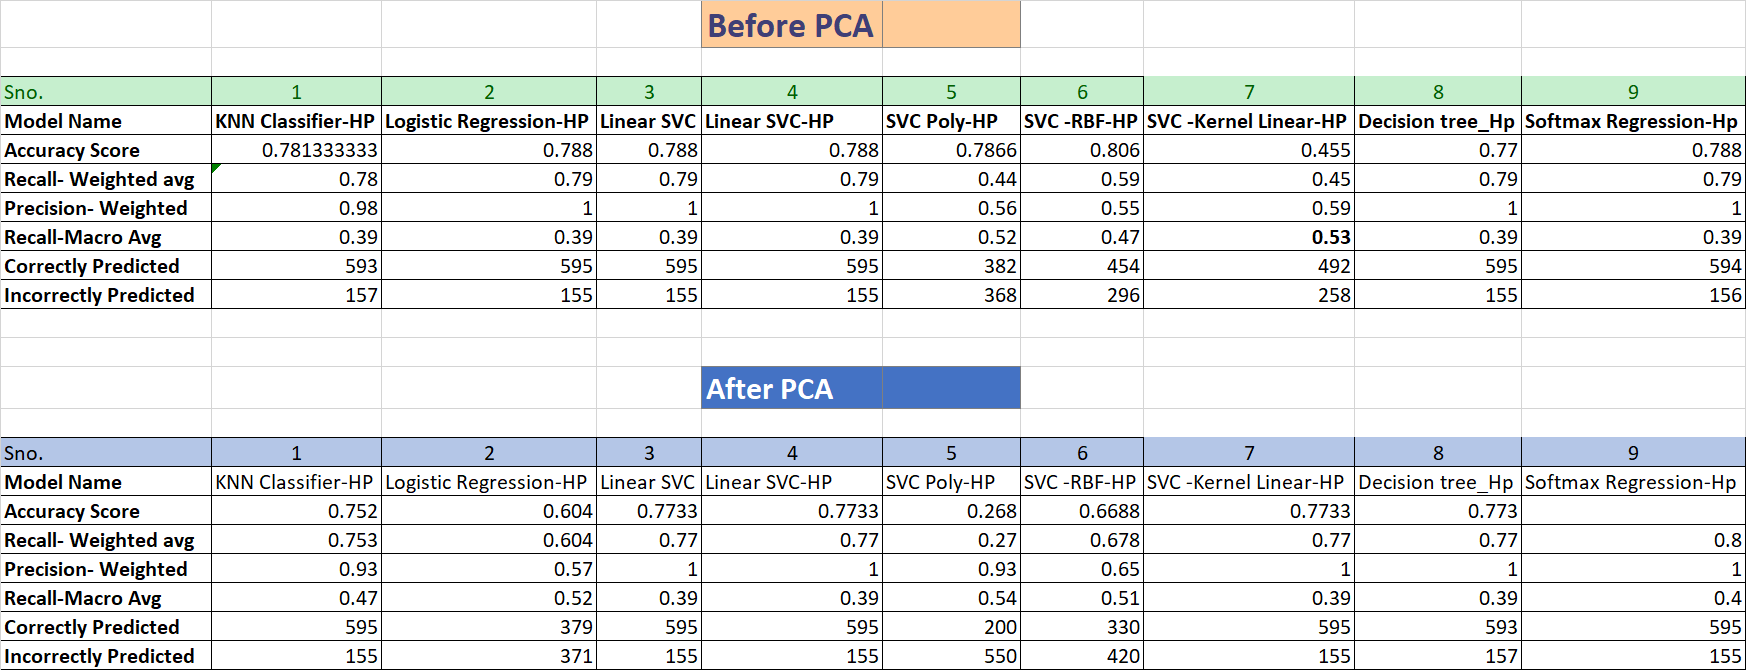

###Comparing Results
When we see the results above and compare the number of correctlypredicted and incorrectly predicted values , We observe that on applying boosting , gradient or PCA improves the results. There thought not a great chnage in Recall , but the number of correcly predicted Potential Customers. In the previous cases the value wsa zero, now we are seeing values in the field.
For SVC poly the recall score incresaed, but SVC liner kernel it reduced

#Project 2 Report
### This is the continuation of project 1. We are continuing the same dataset as used in Project 1.
Hard voting on SVC poly
When we are appling Hard Voting on svc poly, we get a
Predicted Correctly: 160
Predictly Incorrectly: 590


Soft voting on Decision Tree
When we are appling soft Voting on Decision Tree, we get a
Predicted Correctly: 595
Predictly Incorrectly: 155

Baging and Pasting was done on Decision Tree and Logistic Regression

Ada boosting on Decision Tree
When we are appling Ada Boosting on Decision Tree, we get a
Predicted Correctly: 595
Predictly Incorrectly: 155

Ada boosting with Softmax
When we are appling Ada Boosting with Soft max, we get a
Predicted Correctly: 595
Predictly Incorrectly: 155

Gradient Boosting
When we are appling Gradinet Boosting with best parameters {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 1000}, we get a
Predicted Correctly: 509
Predictly Incorrectly: 241

PCA With KNN
Whne we are appling PCA on KNN, we get a
Accuracy Score : 0.79
Predicted Correctly: 595
Predictly Incorrectly: 155

PCA With Logistic Regression
Whne we are appling PCA on Logistic Regression, we get a
Accuracy Score : 0.5053
Predicted Correctly: 379
Predictly Incorrectly: 371

PCA With Linear SVC
Whne we are appling PCA on Linear SVC, we get a
Accuracy Score : 0.7933
Predicted Correctly: 595
Predictly Incorrectly: 155

PCA With SVC Kernel -Poly
Whne we are appling PCA on SVC Kernel -Poly and using Best parameters: Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450} , we get a
Accuracy Score : 0.266
Predicted Correctly: 200
Predictly Incorrectly: 550

PCA With SVC Kernel -RBF
Whne we are appling PCA on SVC Kernel -RBF and using best parameters SVC(C=0.001, gamma=0.001, max_iter=450),Best parameters: {'C': 0.001, 'gamma': 0.001, 'max_iter': 450} , we get a
Accuracy Score : 0.44
Predicted Correctly: 330
Predictly Incorrectly: 420

PCA With SVC Kernel -Linear
Whne we are appling PCA on SVC Kernel -Linear and using best parameters : {'C': 0.001, 'gamma': 0.001, 'max_iter': 450} , we get a
Accuracy Score : 0.63866
Predicted Correctly: 479
Predictly Incorrectly: 271

PCA With Decision Tree
Whne we are appling PCA on Decision Tree , we get a
Train score :0.781
Test score : 0.791
Predicted Correctly: 593
Predictly Incorrectly: 155

PCA on softmax
Whne we are appling PCA on softmax , we get a
Train score :0.7769
Test score : 0.7933
Predicted Correctly: 595
Predictly Incorrectly: 155

Tensorflow.
Next , in the modelling we have tensor flow model. For this we are using relu activation and 3 layers in between. 
It is predicting a total of 595 correxctly and 155 incorrectly.

The Best model as recall score in SVC poly with PCA with a value of 0.54